In [88]:
import networkx as nx
import matplotlib.pyplot as plt

d=4/5

def init(succ,save,name="untitled.png"):
    successeurs = succ
    N=len(succ)
    score = [1/N]*N
    predecesseur = getPredecessor(successeurs)
    algo(successeurs,predecesseur, N, score)
    drawGraph(successeurs,save,name)

def getPredecessor(succ):
    pred=[]
    for i in range(len(succ)):
        pred.append([])
    for i,l in enumerate(succ):
        for j in l:
            pred[j].append(i)
    return pred

def calcScore(pred, succ, current, N, score):
    sum=0
    for j in range(0,len(pred[current])):
        nbSucc = len(succ[pred[current][j]])
        if(nbSucc !=0):
            sum += score[pred[current][j]]/nbSucc
    return d * sum + (1-d) * 1/N

def algo(succ, pred, N, score):
    for i in range(0,30):
        for j in range(0,N):
            score[j] = calcScore(pred, succ, j, N, score)
    total=0
    for i in range(0,N):
        print(i,":", score[i])
        total+=score[i]
    print("total : "+str(total))
    
def drawGraph(succ,save,name="unitled.png"):
    G = nx.DiGraph()
    for i,j in enumerate(succ):
        for k in j:
            G.add_edge(i,k)
    #G.add_edges_from([(0,1), (1,2), (1,3), (2,3)])
    pos=nx.spring_layout(G) # positions for all nodes
    elarge=[(u,v) for (u,v,d) in G.edges(data=True)]

    # drawing
    nx.draw_networkx_nodes(G,pos,node_size=500)
    nx.draw_networkx_edges(G,pos,edgelist=elarge,width=3)
    nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
    plt.axis('off')
    if(save):
        plt.savefig(name) # save as png
    plt.show() # display
    plt.show()

    print(nx.pagerank(G, alpha=4/5))


0 : 0.5
1 : 0.5
total : 1.0


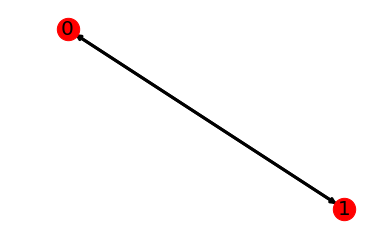

{0: 0.5, 1: 0.5}


In [99]:
successeurs = [[1],[0]]
init(successeurs,False)

0 : 0.09999999999999998
1 : 0.17999999999999997
total : 0.2799999999999999


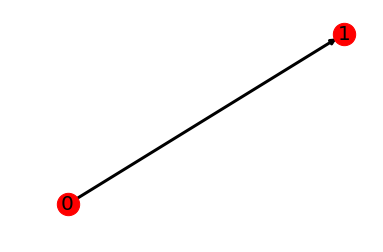

{0: 0.35714270375116797, 1: 0.6428572962488319}


In [100]:
successeurs = [[1],[]]
init(successeurs,True,"Line.png")

0 : 0.46296353055390405
1 : 0.10740749822195798
2 : 0.10740749822195798
3 : 0.10740749822195798
4 : 0.10740749822195798
5 : 0.10740749822195798
total : 1.0000010216636939


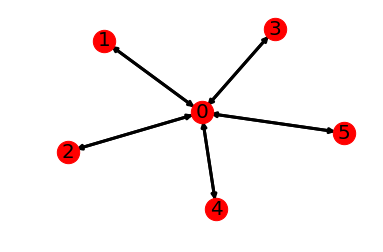

{0: 0.4629618543869062, 1: 0.10740762912261878, 2: 0.10740762912261878, 3: 0.10740762912261878, 4: 0.10740762912261878, 5: 0.10740762912261878}


In [97]:
successeurs = [[1,2,3,4,5],[0],[0],[0],[0],[0]]
init(successeurs,False)

0 : 0.41399428518425374
1 : 0.13896990462056288
2 : 0.13896990462056288
3 : 0.13896990462056288
4 : 0.05636540949554114
5 : 0.05636540949554114
6 : 0.05636540949554114
total : 1.000000227532566


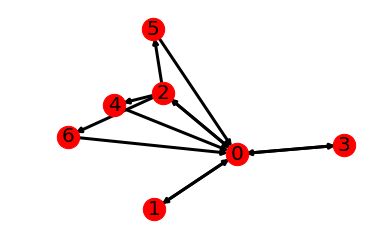

{0: 0.413993822293253, 1: 0.1389700927112572, 2: 0.1389700927112572, 3: 0.1389700927112572, 4: 0.056365299857658424, 5: 0.056365299857658424, 6: 0.056365299857658424}


In [96]:
successeurs = [[1,2,3],[0],[0,4,5,6],[0],[0],[0],[0]]
init(successeurs,False)

0 : 0.3915109389969064
1 : 0.1952837161880746
2 : 0.36320875119752516
3 : 0.04999999999999999
total : 1.000003406382506


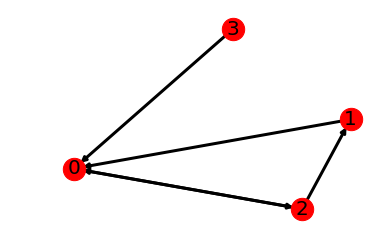

{0: 0.3915092708129946, 1: 0.19528331253660963, 2: 0.36320741665039574, 3: 0.04999999999999999}


In [102]:
successeurs = [[2],[0],[1,0],[0]]
init(successeurs,False)

0 : 0.3567615686499439
1 : 0.3354092549199551
2 : 0.18416370196798204
3 : 0.1236654807871928
total : 1.0000000063250738


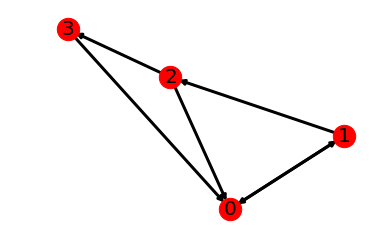

{0: 0.3567619561781838, 1: 0.3354087463682787, 2: 0.1841640288912036, 3: 0.12366526856233381}


In [103]:
successeurs = [[1],[0,2],[0,3],[0]]
init(successeurs,False)

0 : 0.2989510703062592
1 : 0.35209792395069756
2 : 0.2360139966625551
3 : 0.11293706577668135
total : 1.0000000566961933


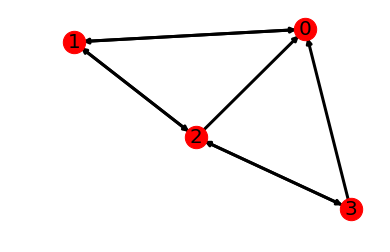

{0: 0.2989512531926102, 1: 0.3520974936147797, 2: 0.23601433977074704, 3: 0.1129369134218631}


In [104]:
successeurs = [[1],[0,2],[0,1,3],[0,2]]
init(successeurs,False)

[[1], [], [0], [0], [0], [0]]
0 : 0.13999999999999996
1 : 0.14533333333333331
2 : 0.033333333333333326
3 : 0.033333333333333326
4 : 0.033333333333333326
5 : 0.033333333333333326
total : 0.4186666666666666


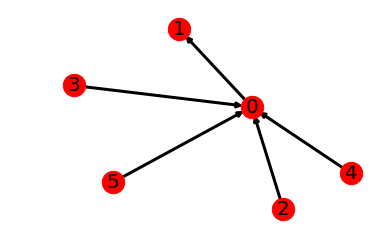

{0: 0.3343948109864988, 1: 0.34713289464143604, 2: 0.07961807359301629, 3: 0.07961807359301629, 4: 0.07961807359301629, 5: 0.07961807359301629}


In [105]:
#successeurs = [[1],[0],[0,4,5,6],[0],[0],[0],[0]]
successeurs = [[1],[]]
for i in range(2,6):
    successeurs.append([0])
print(successeurs)
init(successeurs,False)

[[1], [2, 3, 4, 5], [0], [0], [0], [0]]
0 : 0.3306010937708797
1 : 0.2978142083500371
2 : 0.09289617500334074
3 : 0.09289617500334074
4 : 0.09289617500334074
5 : 0.09289617500334074
total : 1.0000000021342799


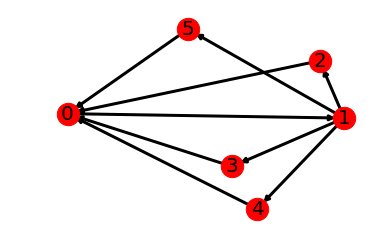

{0: 0.3306001345344454, 1: 0.2978134409608897, 2: 0.0928966061261662, 3: 0.0928966061261662, 4: 0.0928966061261662, 5: 0.0928966061261662}


In [106]:
#successeurs = [[1],[0],[0,4,5,6],[0],[0],[0],[0]]
successeurs = [[1],[]]
for i in range(2,6):
    successeurs[1].append(i)
    successeurs.append([0])
print(successeurs)
init(successeurs,False)